### 1 载入各种数据科学以及可视化库

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
data_train = pd.read_csv('used_car_train_20200313.csv',sep=' ')
data_testA = pd.read_csv('used_car_testA_20200313.csv',sep=' ')

### 2 观察数据

In [4]:
data_train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


#### 特征含义
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

#### 详细信息

In [5]:
data_train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [7]:
print(data_train.shape,data_testA.shape)

(150000, 31) (50000, 30)


### 3 查看缺失值

In [12]:
print(data_train.isnull().sum())
print(data_testA.isnull().sum())

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64
SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893

从统计情况看，训练数据中model、bodyType、fuelType、gearbox存在缺失值

#### 缺失值可视化

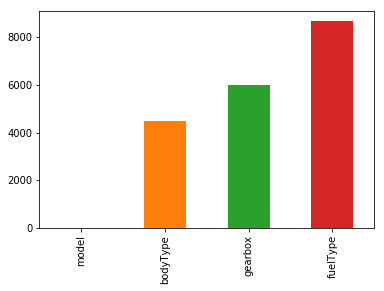

In [13]:
missing = data_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

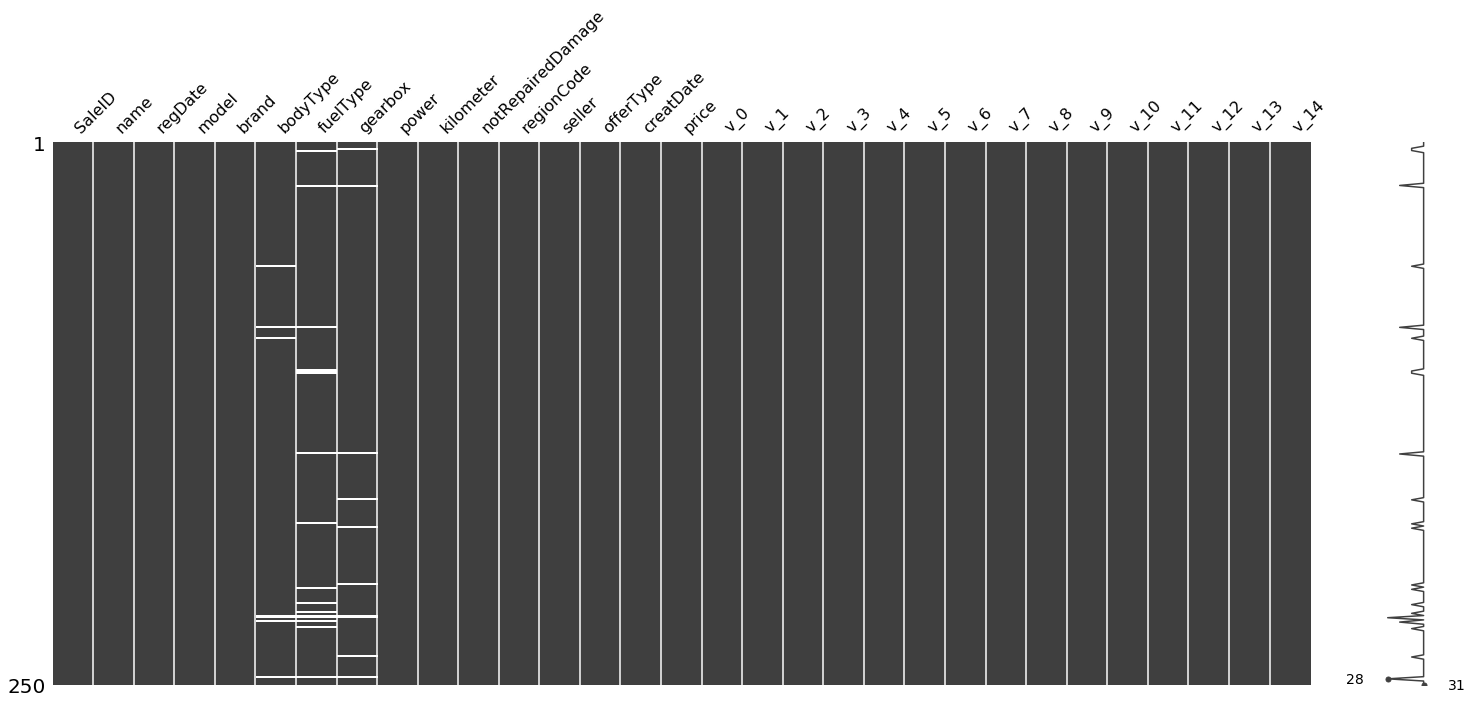

In [14]:
# 可视化看下缺省值
msno.matrix(data_train.sample(250))

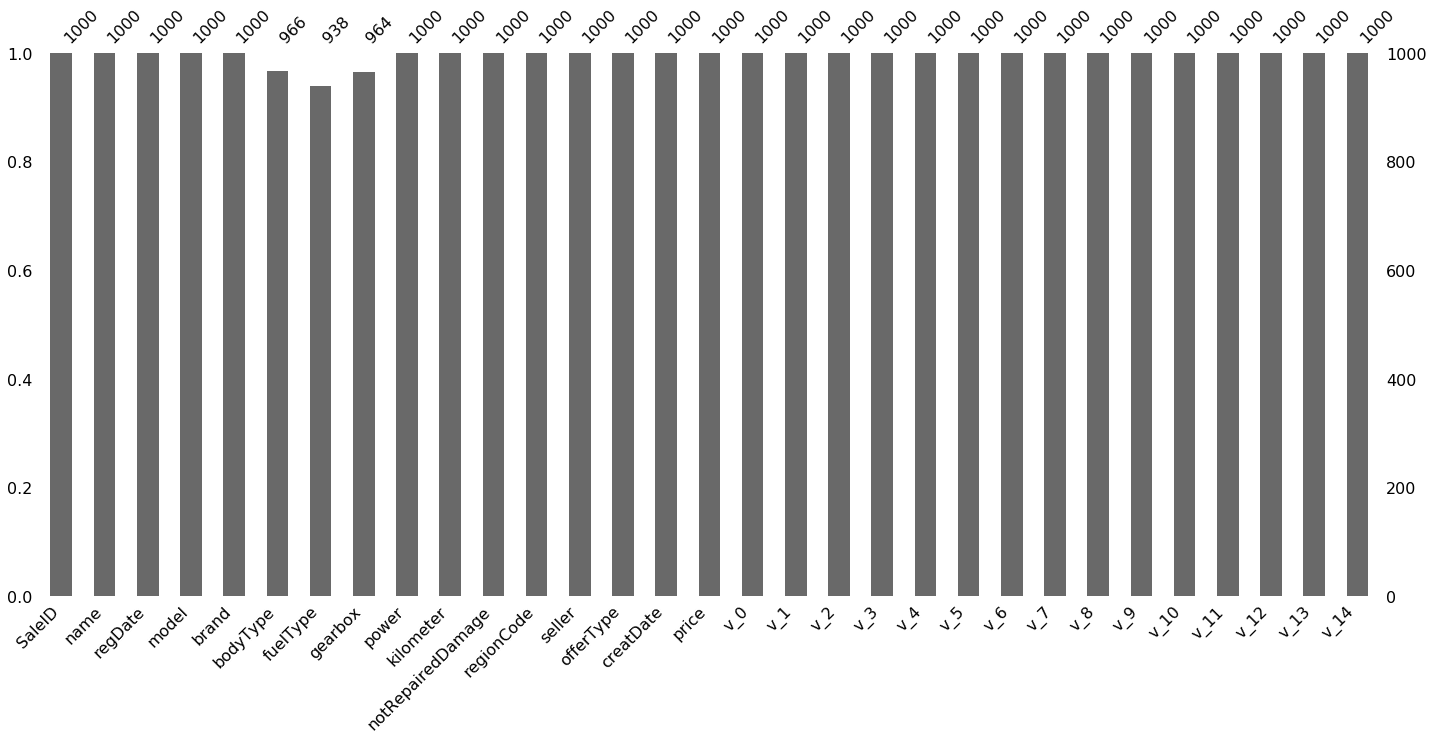

In [15]:
msno.bar(data_train.sample(1000))

数据中只有notRepairedDamage是Object类型

In [16]:
data_train['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan

In [17]:
data_train['notRepairedDamage'].replace('-', np.nan, inplace=True)
data_testA['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [18]:
data_train['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

seller，offerType两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大

In [19]:
print(data_train.seller.value_counts())
print(data_train.offerType.value_counts())

0    149999
1         1
Name: seller, dtype: int64
0    150000
Name: offerType, dtype: int64


In [6]:
del data_train['seller']
del data_train['offerType']
del data_testA['seller']
del data_testA['offerType']

In [22]:
data_train.shape

(150000, 29)

### 4 了解预测值的分布

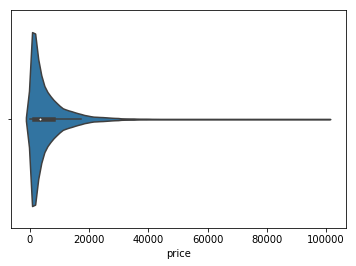

In [25]:
sns.violinplot(data_train.price)

可以看出，数据基本服从长尾分布

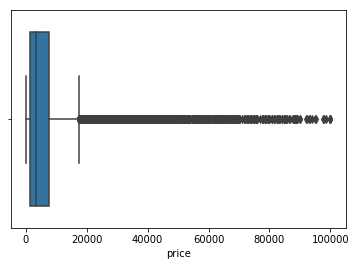

In [26]:
sns.boxplot(data_train.price)

从箱线图中可以看出，大部分数据在0～20000之间

/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


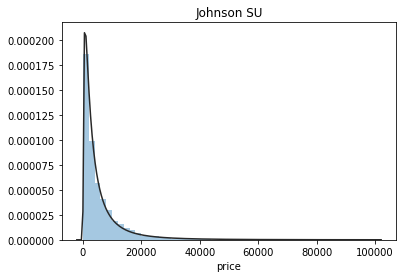

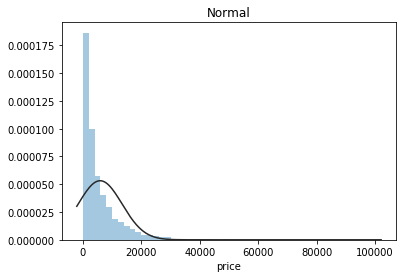

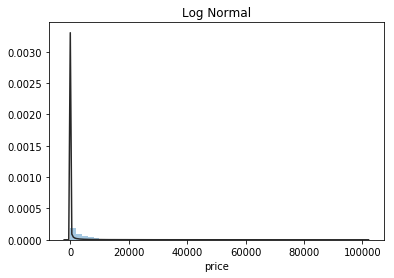

In [28]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = data_train['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，先对其进行转换

/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 3.346487
Kurtosis: 18.995183


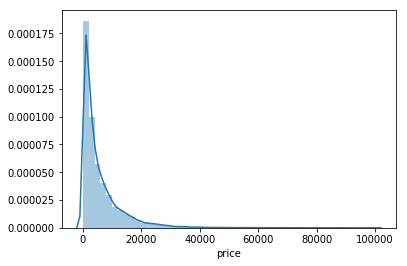

In [30]:
## 2) 查看skewness and kurtosis
sns.distplot(data_train['price']);
print("Skewness: %f" % data_train['price'].skew())
print("Kurtosis: %f" % data_train['price'].kurt())

**skewness**：Definition:是描述数据分布形态的统计量，其描述的是某总体取值分布的**对称性**，简单来说就是数据的**不对称程度**。
偏度是三阶中心距计算出来的。
（1）Skewness = 0 ，分布形态与正态分布偏度相同。
（2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
（3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。
（4）数值的绝对值越大，表明数据分布越不对称，偏斜程度大。
计算公式：
$Skewness=E[((x-E(x))/(\sqrt{D(x)}))^3]$  
| Skewness| 越大，分布形态偏移程度越大。
**kurtosis**：Definition:偏度是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的**尖锐程度**。
峰度是四阶标准矩计算出来的。
（1）Kurtosis=0 与正态分布的陡缓程度相同。
（2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
（3）Kurtosis<0 比正态分布的高峰来得平台——平顶峰
计算公式：
$Kurtosis=E[ ( (x-E(x))/ (\sqrt(D(x))) )^4 ]-3$

/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


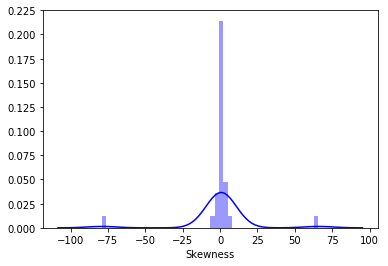

In [32]:
#数据的偏度
sns.distplot(data_train.skew(),color='blue',axlabel ='Skewness')

/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


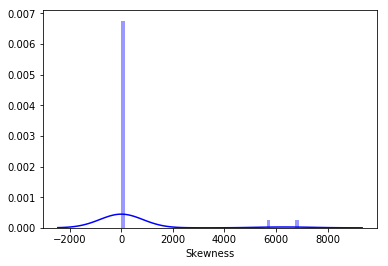

In [35]:
sns.distplot(data_train.kurt(),color='blue',axlabel ='Skewness')

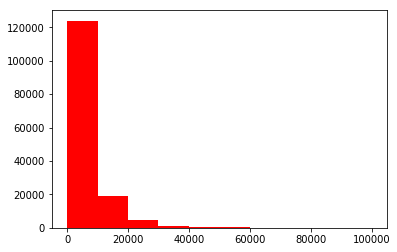

In [36]:
## 3) 查看预测值的具体频数
plt.hist(data_train['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

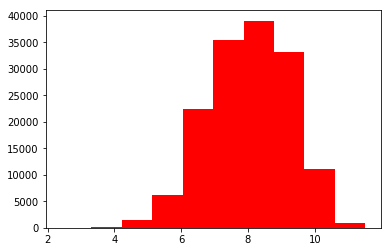

In [39]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(data_train['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

### 5 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [41]:
# 数字特征
numeric_features = data_train.select_dtypes(include=[np.number])
print(numeric_features.columns)
# # 类型特征
categorical_features = data_train.select_dtypes(include=[np.object])
print(categorical_features.columns)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'creatDate', 'price',
       'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')
Index(['notRepairedDamage'], dtype='object')


上述方法不适用，因为有些类型特征也是由数字表示的，需要人工区分

In [42]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [46]:
# 特征nunique分布
for cat_fea in categorical_features:
#     print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, data_train[cat_fea].nunique()))
#     print(data_train[cat_fea].value_counts())

name特征有个99662不同的值
model特征有个248不同的值
brand特征有个40不同的值
bodyType特征有个8不同的值
fuelType特征有个7不同的值
gearbox特征有个2不同的值
notRepairedDamage特征有个2不同的值
regionCode特征有个7905不同的值


### 数字特征分析

In [47]:
numeric_features.append('price')

In [48]:
## 1) 相关性分析
price_numeric = data_train[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



#### 用热力图表示

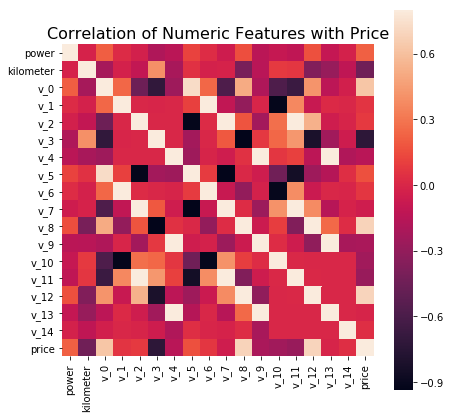

In [50]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [57]:
## 2) 查看几个特征的偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data_train[col].skew()) , 
          '  ' ,
          'Kurtosis: {:06.2f}'.format(data_train[col].kurt())  
         )

power           Skewness: 65.86    Kurtosis: 5733.45
kilometer       Skewness: -1.53    Kurtosis: 001.14
v_0             Skewness: -1.32    Kurtosis: 003.99
v_1             Skewness: 00.36    Kurtosis: -01.75
v_2             Skewness: 04.84    Kurtosis: 023.86
v_3             Skewness: 00.11    Kurtosis: -00.42
v_4             Skewness: 00.37    Kurtosis: -00.20
v_5             Skewness: -4.74    Kurtosis: 022.93
v_6             Skewness: 00.37    Kurtosis: -01.74
v_7             Skewness: 05.13    Kurtosis: 025.85
v_8             Skewness: 00.20    Kurtosis: -00.64
v_9             Skewness: 00.42    Kurtosis: -00.32
v_10            Skewness: 00.03    Kurtosis: -00.58
v_11            Skewness: 03.03    Kurtosis: 012.57
v_12            Skewness: 00.37    Kurtosis: 000.27
v_13            Skewness: 00.27    Kurtosis: -00.44
v_14            Skewness: -1.19    Kurtosis: 002.39
price           Skewness: 03.35    Kurtosis: 019.00


/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/myth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/myth/anaconda3/lib/python3.6/site-pack

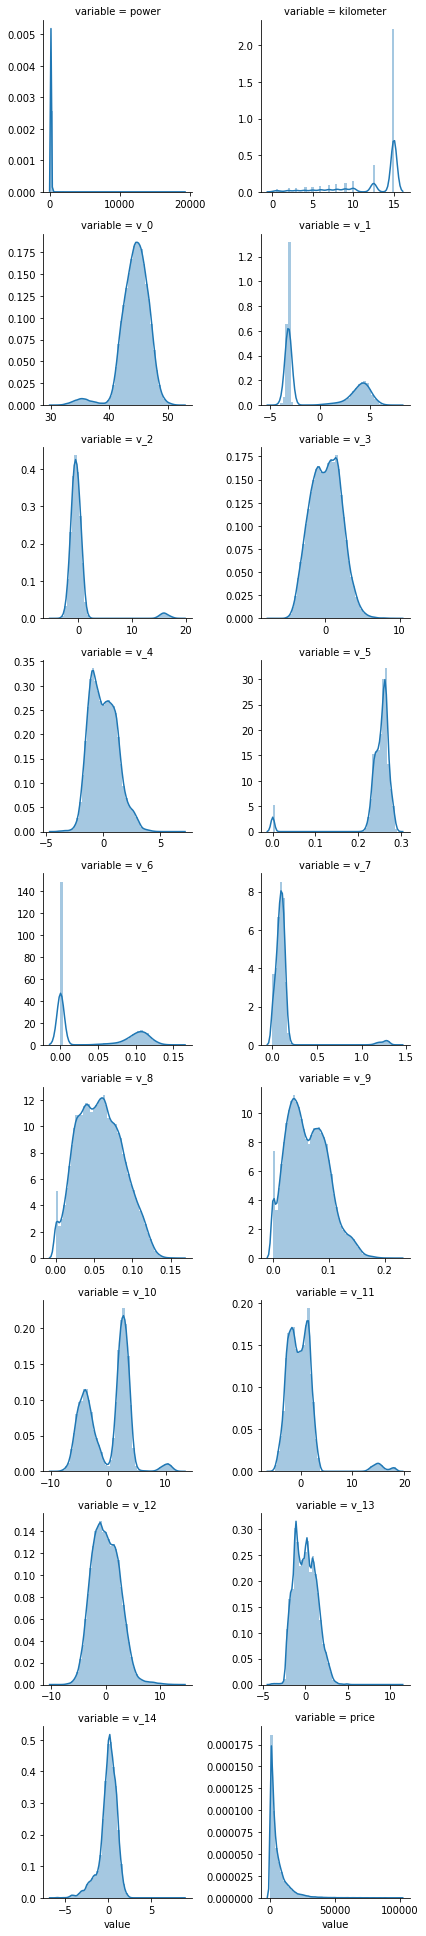

In [58]:
## 3) 每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

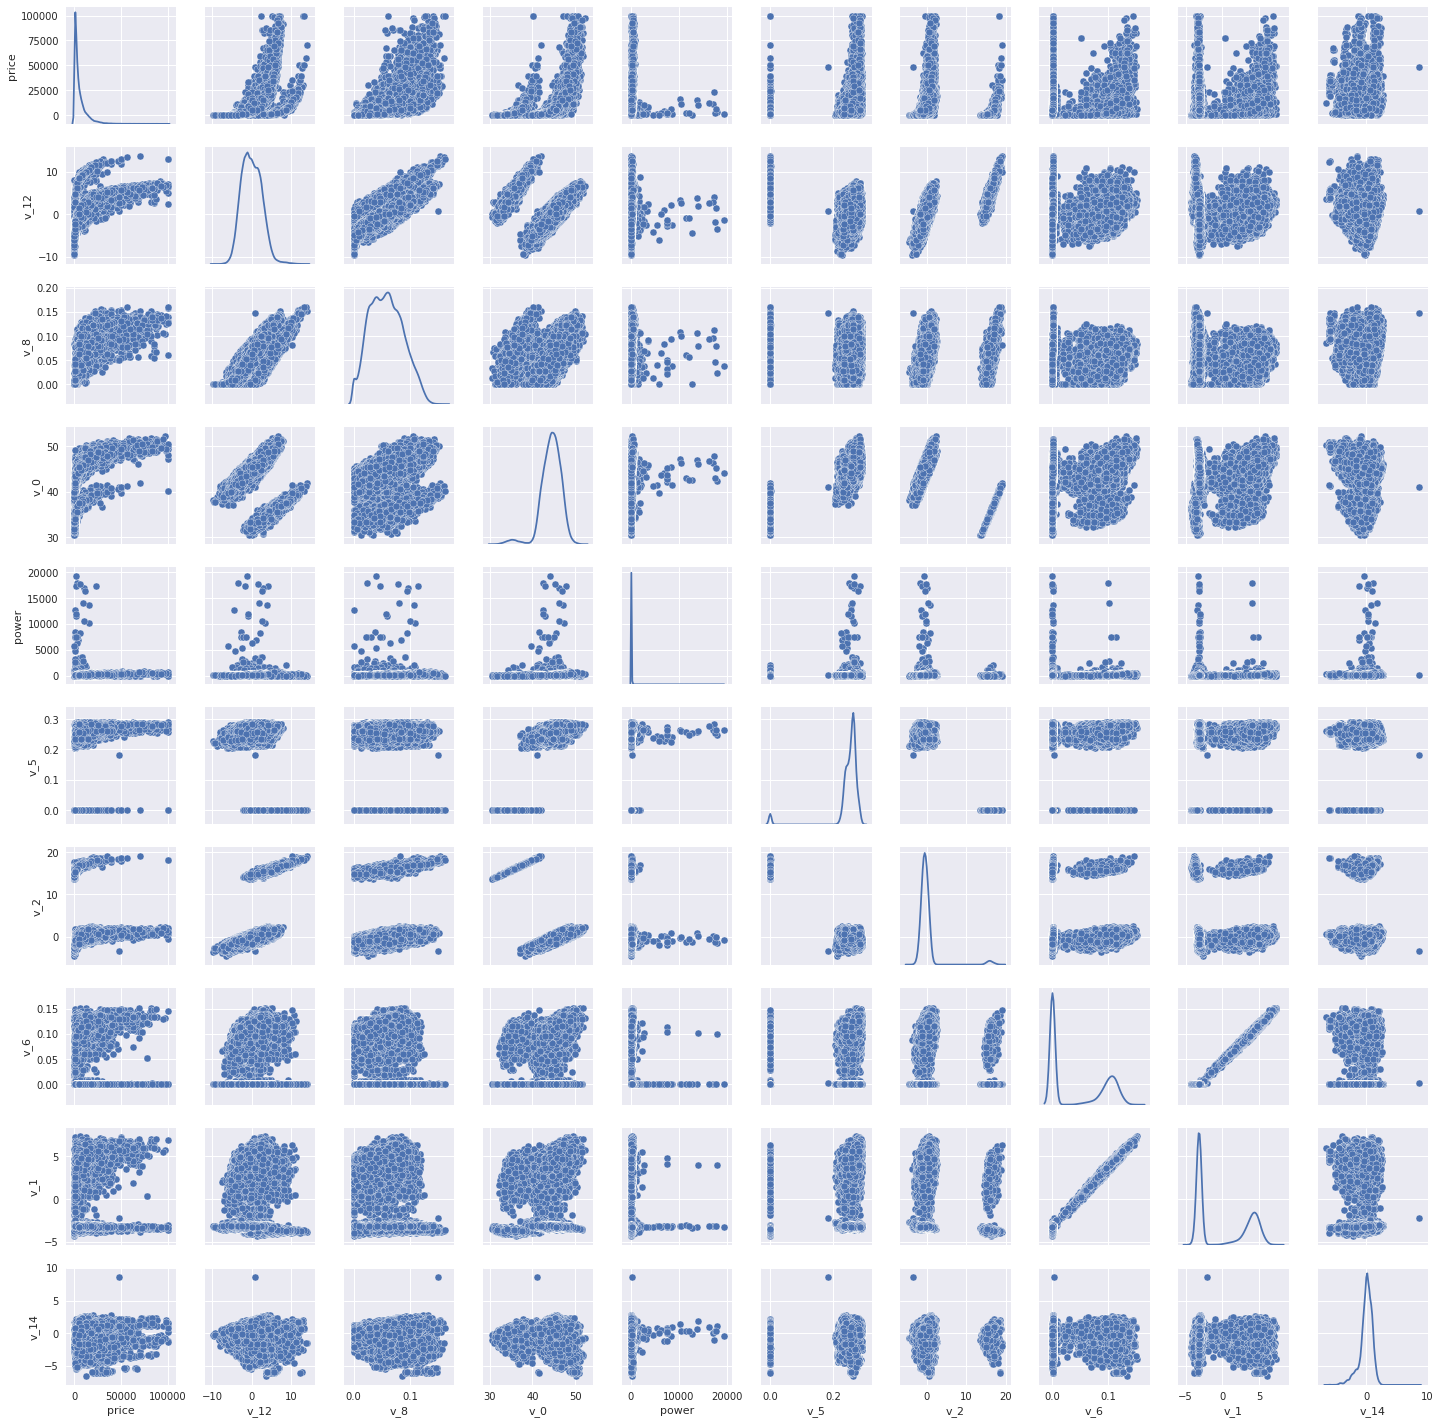

In [59]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(data_train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

参考资料：pairplot相关用法  
https://www.jianshu.com/p/6e18d21a4cad

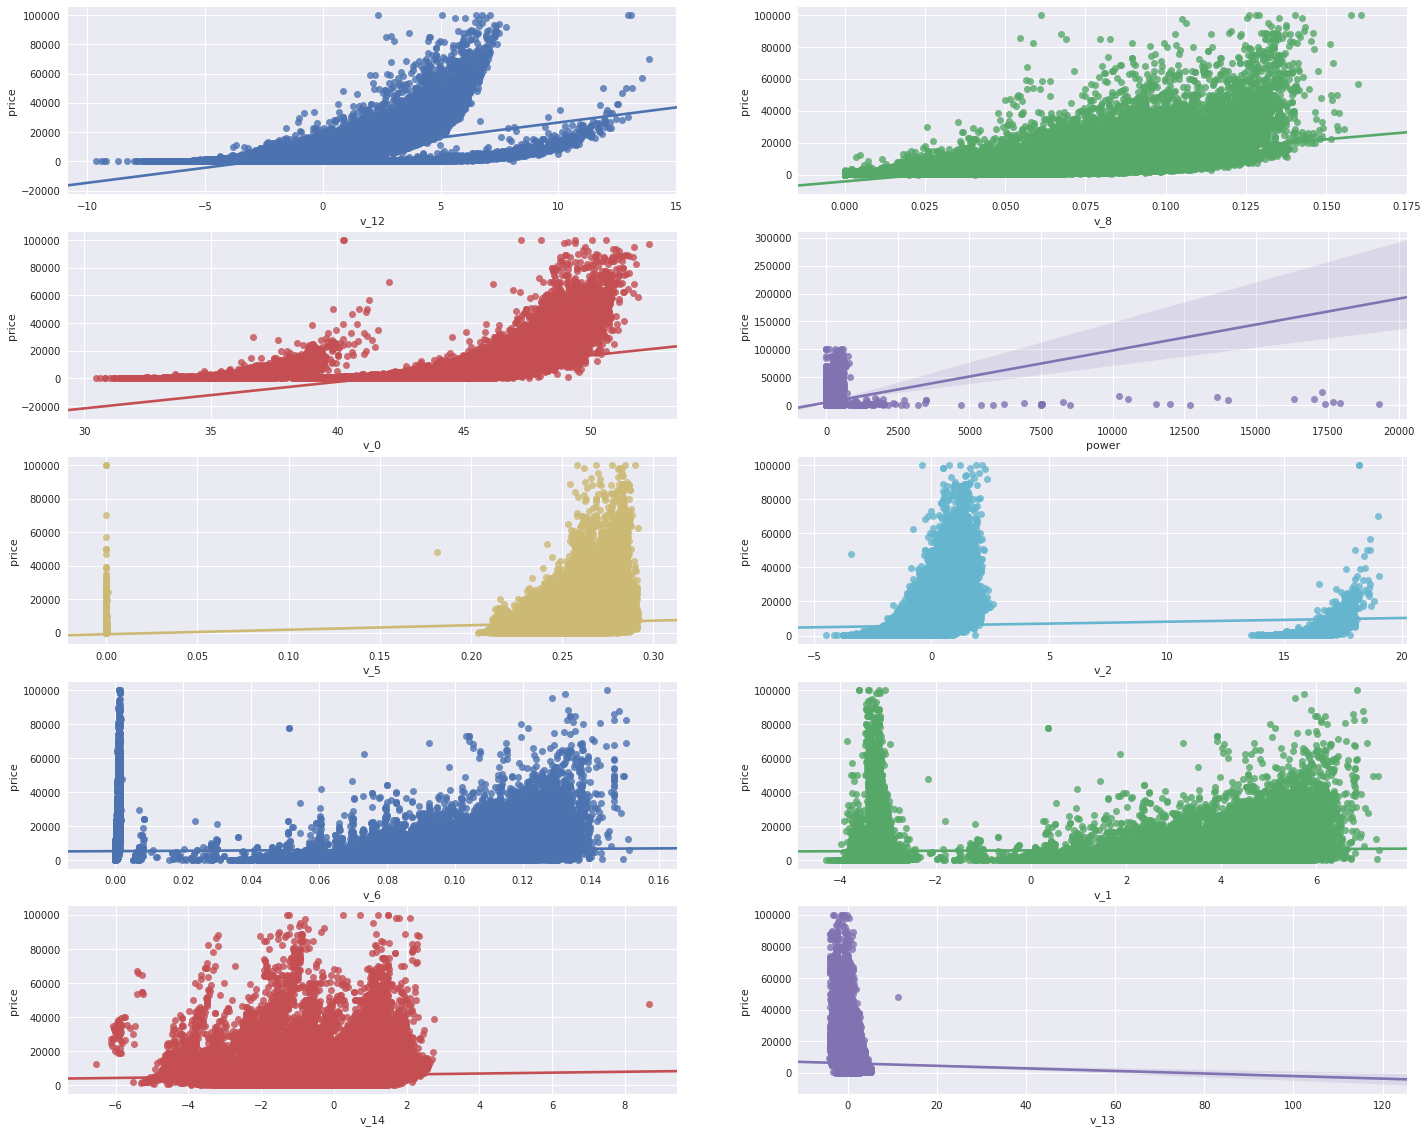

In [61]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([data_train['price'],data_train['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([data_train['price'],data_train['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([data_train['price'],data_train['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([data_train['price'],data_train['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([data_train['price'],data_train['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([data_train['price'],data_train['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([data_train['price'],data_train['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([data_train['price'],data_train['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([data_train['price'],data_train['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([data_train['price'],data_train['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

### 类别特征分析

In [63]:
## 1) unique分布
for fea in categorical_features:
    print(data_train[fea].nunique())

99662
248
40
8
7
2
2
7905


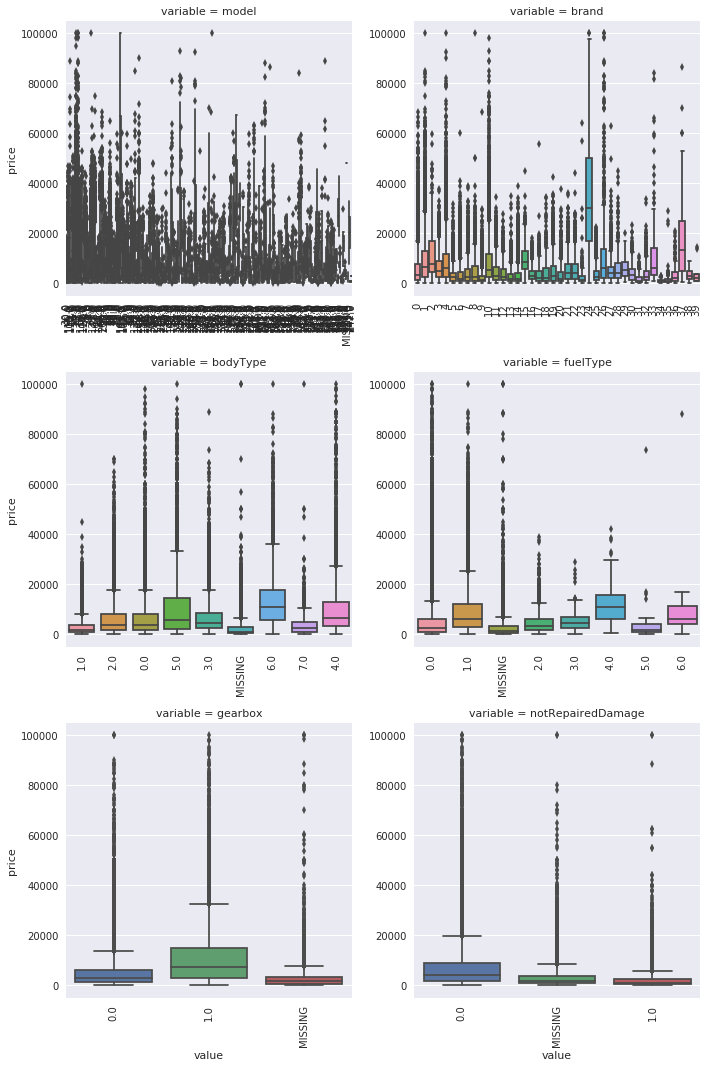

In [64]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    data_train[c] = data_train[c].astype('category')
    if data_train[c].isnull().any():
        data_train[c] = data_train[c].cat.add_categories(['MISSING'])
        data_train[c] = data_train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(data_train, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

#### 常用的画图函数：  
箱线图  
sns.boxplot(x=x, y=y，data=data)  
小提琴图  
sns.violinplot(x=x, y=y，data=data)  
柱状图  
sns.barplot(x=x, y=y，data=data)  
频数柱状图  
sns.countplot(x=x)

### 用pandas_profiling生成数据报告

In [2]:
import pandas_profiling

In [7]:
pfr = pandas_profiling.ProfileReport(data_train)
pfr.to_file("./example.html")

In [ ]:
HBox(children=(FloatProgress(value=0.0, description='variables', max=29.0, style=ProgressStyle(description_wid…






HBox(children=(FloatProgress(value=0.0, description='correlations', max=6.0, style=ProgressStyle(description_w…






HBox(children=(FloatProgress(value=0.0, description='interactions [continuous]', max=729.0, style=ProgressStyl…






HBox(children=(FloatProgress(value=0.0, description='table', max=1.0, style=ProgressStyle(description_width='i…






HBox(children=(FloatProgress(value=0.0, description='missing', max=4.0, style=ProgressStyle(description_width=…






HBox(children=(FloatProgress(value=0.0, description='warnings', max=3.0, style=ProgressStyle(description_width…






HBox(children=(FloatProgress(value=0.0, description='package', max=1.0, style=ProgressStyle(description_width=…






HBox(children=(FloatProgress(value=0.0, description='build report structure', max=1.0, style=ProgressStyle(des…
